<a href="https://colab.research.google.com/github/wilky8333/Chaos_prediction_neural_network/blob/main/backpropagation_chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Collab to access drive acc
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = r'/content/drive/MyDrive/Chaos_Bpnn/Sorted_Exchange_Rates_CNY_to_IDR.xlsx'
data = pd.read_excel(file_path)
print(data.head(1475))


        NO  Value     Sell      Buy       Date
0     1474      1  2122.75  2101.72 2019-01-02
1     1473      1  2119.45  2098.47 2019-01-03
2     1472      1  2102.76  2081.77 2019-01-04
3     1471      1  2068.98  2048.25 2019-01-07
4     1470      1  2061.49  2041.02 2019-01-08
...    ...    ...      ...      ...        ...
1469     5      1  2240.40  2218.05 2024-12-23
1470     4      1  2224.87  2202.67 2024-12-24
1471     3      1  2231.74  2209.51 2024-12-27
1472     2      1  2237.54  2215.25 2024-12-30
1473     1      1  2225.26  2203.08 2024-12-31

[1474 rows x 5 columns]


In [ ]:
df_selected_ = data[['Date', 'Sell']]
# Display the selected data
print(df_selected_.head(1475))

           Date     Sell
0    2019-01-02  2122.75
1    2019-01-03  2119.45
2    2019-01-04  2102.76
3    2019-01-07  2068.98
4    2019-01-08  2061.49
...         ...      ...
1469 2024-12-23  2240.40
1470 2024-12-24  2224.87
1471 2024-12-27  2231.74
1472 2024-12-30  2237.54
1473 2024-12-31  2225.26

[1474 rows x 2 columns]


In [ ]:
df_selected_ = df_selected_.copy()

# Normalisasi kolom 'buy'
df_selected_['Sell'] = (df_selected_['Sell'] - df_selected_['Sell'].min()) / (df_selected_['Sell'].max() - df_selected_['Sell'].min())

print(df_selected_.head(1475))

           Date      Sell
0    2019-01-02  0.394741
1    2019-01-03  0.386523
2    2019-01-04  0.344962
3    2019-01-07  0.260845
4    2019-01-08  0.242193
...         ...       ...
1469 2024-12-23  0.687709
1470 2024-12-24  0.649036
1471 2024-12-27  0.666144
1472 2024-12-30  0.680587
1473 2024-12-31  0.650007

[1474 rows x 2 columns]


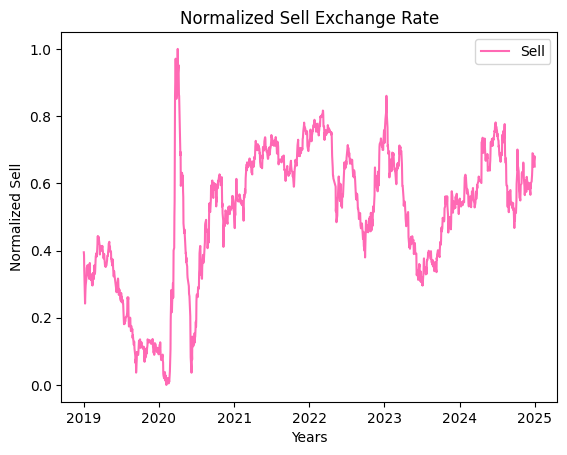

In [ ]:
# Extract Date and Buy columns
x_axis= df_selected_['Date']
y_axis= df_selected_['Sell']

# Plot the 'Buy' data with 'Date' on the x-axis
plt.plot(x_axis, y_axis, color='hotpink', label='Sell')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Normalized Sell')
plt.title('Normalized Sell Exchange Rate')

# Display the legend
plt.legend()

# Show the plot
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# --- Membuat dataset dengan windowing ---
def create_dataset(data, window_size=3):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size]['Sell'].values)
        y.append(data.iloc[i+window_size]['Sell'])
    return np.array(X), np.array(y)

X,y = create_dataset(df_selected_, window_size=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=0, shuffle=False)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1029, 3)
y_train shape: (1029,)
X_val shape: (221, 3)
y_val shape: (221,)
X_test shape: (221, 3)
y_test shape: (221,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def feedforward_sigmoid(W1, W2, b1, b2, x):
    z_in = np.dot(x, W1) + b1
    A1 = relu(z_in)
    y_in = np.dot(A1, W2) + b2
    A2 = sigmoid(y_in)
    return A2, A1, z_in, y_in

def feedforward_linear(W1, W2, b1, b2, x):
    z_in = np.dot(x, W1) + b1
    A1 = relu(z_in)
    y_in = np.dot(A1, W2) + b2
    A2 = linear(y_in)
    return A2, A1, z_in, y_in


def backpropagation_sigmoid(W1, W2, A1, A2, x, z_in, y, y_in):
    error = A2 - y
    delta_k = error * sigmoid_derivative(y_in)
    dW2 = np.dot(A1.T, delta_k)
    db2 = delta_k

    delta_j = np.dot(delta_k, W2.T) * relu_derivative(z_in)
    dW1 = np.dot(x.T, delta_j)
    db1 = delta_j

    return dW1, db1, dW2, db2


def backpropagation_linear(W1, W2, A1, A2, x, z_in, y, y_in):
    error = A2 - y
    delta_k = error * linear_derivative(y_in)
    dW2 = np.dot(A1.T, delta_k)
    db2 = delta_k

    delta_j = np.dot(delta_k, W2.T) * relu_derivative(z_in)
    dW1 = np.dot(x.T, delta_j)
    db1 = delta_j

    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

## Feedforward dengan output aktivasi linear ##
Epoch 1/500  | Train Loss: 0.015885  | Val Loss: 0.001362
CPU Time : 0.07305446100001234 seconds
Epoch 2/500  | Train Loss: 0.006273  | Val Loss: 0.001043
CPU Time : 0.14703102100000365 seconds
Epoch 3/500  | Train Loss: 0.004117  | Val Loss: 0.000862
CPU Time : 0.2183446650000036 seconds
Epoch 4/500  | Train Loss: 0.002817  | Val Loss: 0.000757
CPU Time : 0.2859961609999999 seconds
Epoch 5/500  | Train Loss: 0.002023  | Val Loss: 0.000691
CPU Time : 0.35425230600000646 seconds
Epoch 6/500  | Train Loss: 0.001540  | Val Loss: 0.000647
CPU Time : 0.42887526700000933 seconds
Epoch 7/500  | Train Loss: 0.001251  | Val Loss: 0.000621
CPU Time : 0.498371817000006 seconds
Epoch 8/500  | Train Loss: 0.001078  | Val Loss: 0.000605
CPU Time : 0.5617583810000042 seconds
Epoch 9/500  | Train Loss: 0.000970  | Val Loss: 0.000595
CPU Time : 0.6264967420000005 seconds
Epoch 10/500  | Train Loss: 0.000903  | Val Loss: 0.000588
CPU Time : 0.6915670770000

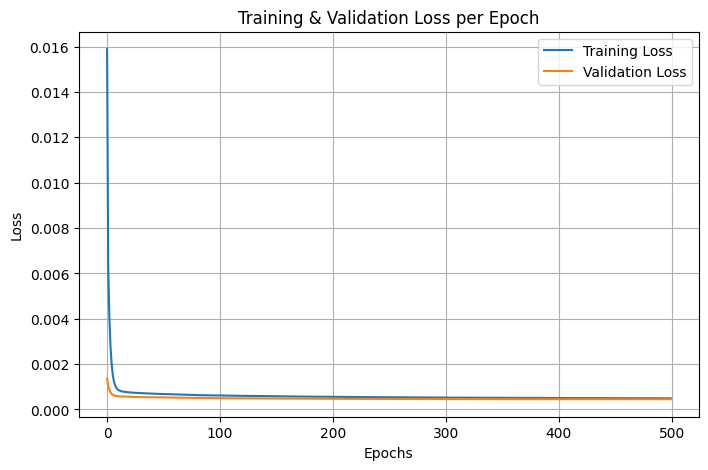

Current CPU Usage: 21.4%


In [ ]:
import time
import psutil


def get_cpu_usage():
    usage_percent = psutil.cpu_percent()
    print(f"Current CPU Usage: {usage_percent}%")

s = time.process_time()#start time
# --- Inisialisasi ---
input_neurons = X_train.shape[1]
hidden_neurons = 256
output_neurons = 1

def xavier_init_uniform(in_dim, out_dim):
    limit = np.sqrt(6 / (in_dim + out_dim))
    return np.random.uniform(-limit, limit, (in_dim, out_dim))

W1 = xavier_init_uniform(input_neurons, hidden_neurons)
W2 = xavier_init_uniform(hidden_neurons, output_neurons)
b1 = np.zeros((1, hidden_neurons))
b2 = np.zeros((1, output_neurons))

learning_rate=0.002
epochs=500

train_losses = []
val_losses = []
print("## Feedforward dengan output aktivasi linear ##")
for epoch in range(epochs):
    train_loss = 0

    for i in range(len(X_train)):
        x = X_train[i].reshape(1, -1)
        y = y_train[i]

        # Feedforward
        A2,A1,z_in, y_in = feedforward_linear(W1, W2, b1, b2, x)

        # Backpropagation
        dW1, db1, dW2, db2 = backpropagation_linear(W1, W2, A1, A2, x, z_in, y, y_in)

        # Update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        # Hitung loss
        train_loss += mse_loss(y, A2)

    avg_train_loss = train_loss / len(X_train)
    train_losses.append(avg_train_loss)

    # --- Validasi ---
    val_loss = 0
    for i in range(len(X_val)):
        x_val = X_val[i].reshape(1, -1)
        y_val_true = y_val[i]

        A2_val,A1_val,z_in_val, y_in_val = feedforward_linear(W1, W2, b1, b2, x_val)
        val_loss += mse_loss(y_val_true, A2_val)

    avg_val_loss = val_loss / len(X_val)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs}  | Train Loss: {avg_train_loss:.6f}  | Val Loss: {avg_val_loss:.6f}")

    e = time.process_time()#end time\
    print(f"CPU Time : {e - s} seconds")
# --- Plot Loss ---
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss per Epoch")
plt.legend()
plt.grid()
plt.show()
get_cpu_usage()

Test Loss: 0.021064967483325675


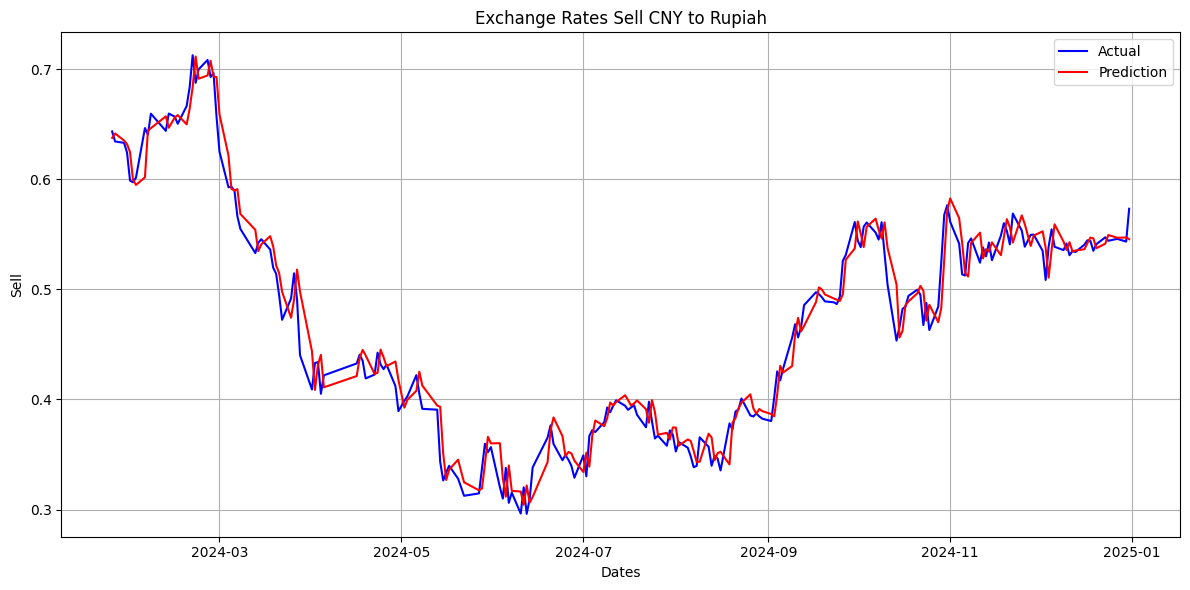

In [ ]:
# --- prediction ---
A2_predict,_,_,_=feedforward_linear(W1, W2, b1, b2, X_test)
test_losses=mse_loss(y_test,A2_predict)
print("Test Loss:", test_losses)

# Ambil tanggal sesuai panjang data test (tanpa shuffle)
date_test = df_selected_['Date'][-len(y_test):].reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label="Actual", color="blue")
plt.plot(date_test, A2_predict, label="Prediction", color="red")
plt.xlabel("Dates")
plt.ylabel("Sell")
plt.title("Exchange Rates Sell CNY to Rupiah")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

